In [1]:
import pickle
import pandas as pd
import os

In [2]:
mlp = pickle.load(open(('pkl_objects/model.pkl'), 'rb'))

In [3]:
data=pd.read_csv('Dataset2.csv', low_memory=False)

def preprocessing(data):
    data['Date']=pd.to_datetime(data['Date'])
    data['day_of_week']=data['Date'].dt.dayofweek
    data['Weekend']=round(data['day_of_week']/9,0)
    data['one_day_mean']=data['System_Load'].rolling(window=24).mean()
    data['shift_day']=data['System_Load'].shift(24)
    data['shift_week']=data['System_Load'].shift(168)
    data['relative']=(data['Date']-data['Date'][0])/pd.Timedelta('1 day')
    data.fillna(0,inplace=True)
    return data

preprocessing(data)
X=data.drop(['Date','System_Load'],axis=1)
Y=data['System_Load'].ravel()


In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [6]:
Ypred=mlp.predict(X)

In [7]:
mean_absolute_error(Y,Ypred)

0.1140522601477179

In [8]:
mean_squared_error(Y,Ypred)

0.03586960235257858

In [9]:
residuals=Y-Ypred

In [10]:
import matplotlib.pylab as plt
import seaborn as sns

## Residuals Histogram Plot

In [11]:
# Residuals are approximately normally distributted around 0. Shows that the model is doing well.

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Residuals')

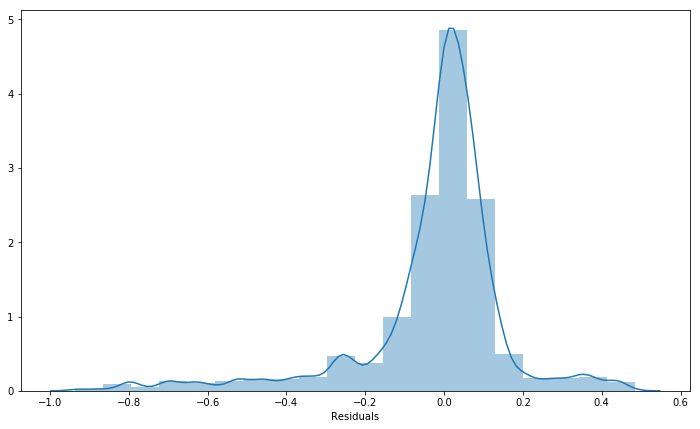

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(residuals,bins=20)
plt.xlabel('Residuals')

## Target-Residuals Plot

In [13]:
# Residuals is densely populated around zero across all target values. Shows that there is no inherent patterned bias 
# in the model

Text(0,0.5,'Residuals')

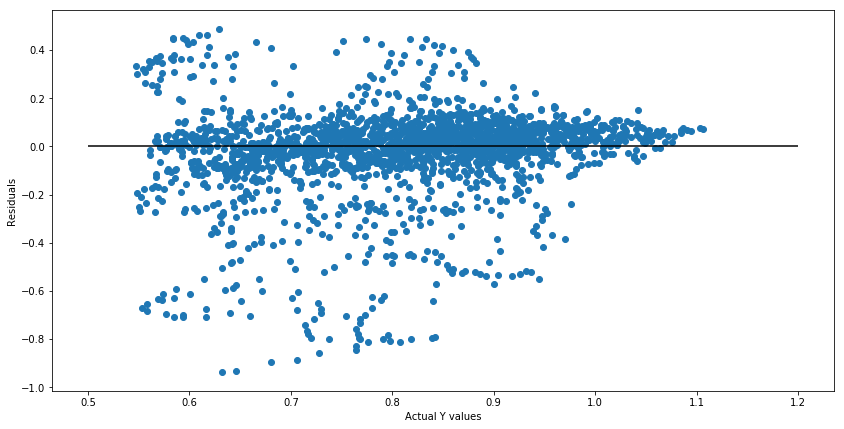

In [14]:
plt.figure(figsize=(14,7))
plt.scatter(Y,residuals)
plt.hlines(0,0.5,1.2)
plt.xlabel('Actual Y values')
plt.ylabel('Residuals')

## Actual-Predicted Regression Plot

C:\Users\ADEBAYO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1440x720 with 0 Axes>

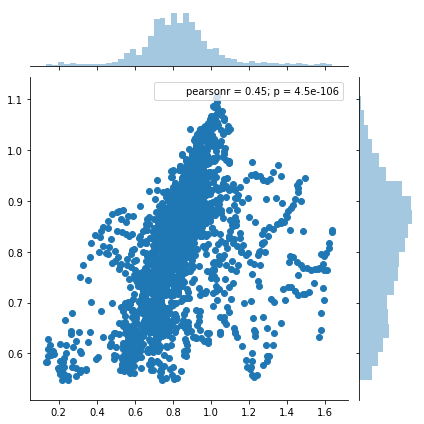

In [15]:
plt.figure(figsize=(20,10))
sns.jointplot(Ypred,Y)